In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
vehicles_df = pd.read_csv('../practical_application_II_starter/data/vehicles.csv')

In [4]:
vehicles_df = vehicles_df.drop(columns=['id', 'region', 'manufacturer', 'model', 'cylinders', 'transmission', 'VIN', 'drive', 'size', 'state', 'paint_color'])

In [5]:
vehicles_df

,price,year,condition,fuel,odometer,title_status,type
0,6000,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
426875,23590,2019.0,good,gas,32226.0,clean,sedan
426876,30590,2020.0,good,gas,12029.0,clean,sedan
426877,34990,2020.0,good,diesel,4174.0,clean,hatchback
426878,28990,2018.0,good,gas,30112.0,clean,sedan


In [6]:
condition_count = vehicles_df['condition'].value_counts()
fuel_count = vehicles_df['fuel'].value_counts()
title_status_count = vehicles_df['title_status'].value_counts()
type_count = vehicles_df['type'].value_counts()

print("Number of categories in the condition column:")
print(condition_count)

print("\nNumber of categories in the fuel column:")
print(fuel_count)

print("\nNumber of categories in the title status column:")
print(title_status_count)

print("\nNumber of categories in the type column:")
print(type_count)


Number of categories in the condition column:
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

Number of categories in the fuel column:
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

Number of categories in the title status column:
title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

Number of categories in the type column:
type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64


In [7]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   condition     252776 non-null  object 
 3   fuel          423867 non-null  object 
 4   odometer      422480 non-null  float64
 5   title_status  418638 non-null  object 
 6   type          334022 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 22.8+ MB


In [8]:
vehicles_df.isna().sum()
vehicles_df = vehicles_df.dropna()
vehicles_df.isna().sum()

price           0
year            0
condition       0
fuel            0
odometer        0
title_status    0
type            0
dtype: int64

In [9]:
vehicles_df

,price,year,condition,fuel,odometer,title_status,type
27,33590,2014.0,good,gas,57923.0,clean,pickup
28,22590,2010.0,good,gas,71229.0,clean,pickup
29,39590,2020.0,good,gas,19160.0,clean,pickup
30,30990,2017.0,good,gas,41124.0,clean,pickup
31,15000,2013.0,excellent,gas,128000.0,clean,truck
...,...,...,...,...,...,...,...
426875,23590,2019.0,good,gas,32226.0,clean,sedan
426876,30590,2020.0,good,gas,12029.0,clean,sedan
426877,34990,2020.0,good,diesel,4174.0,clean,hatchback
426878,28990,2018.0,good,gas,30112.0,clean,sedan


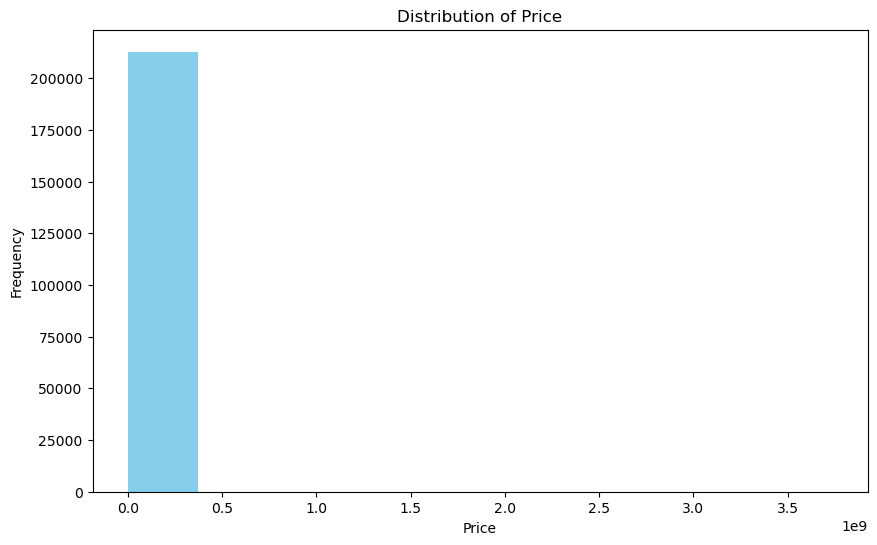

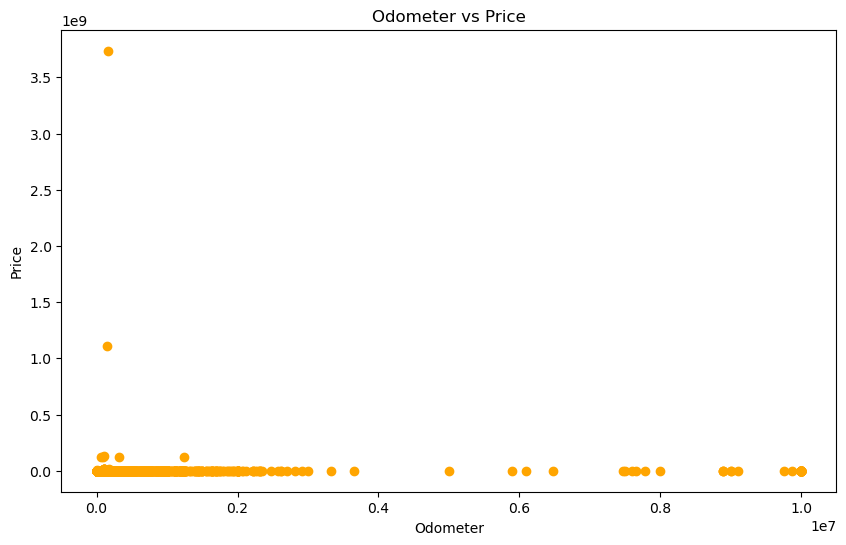

In [10]:
import matplotlib.pyplot as plt

# Plot the distribution of price
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['price'], bins=10, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

# Plot the relationship between odometer and price
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_df['odometer'], vehicles_df['price'], color='orange')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Odometer vs Price')
plt.show()


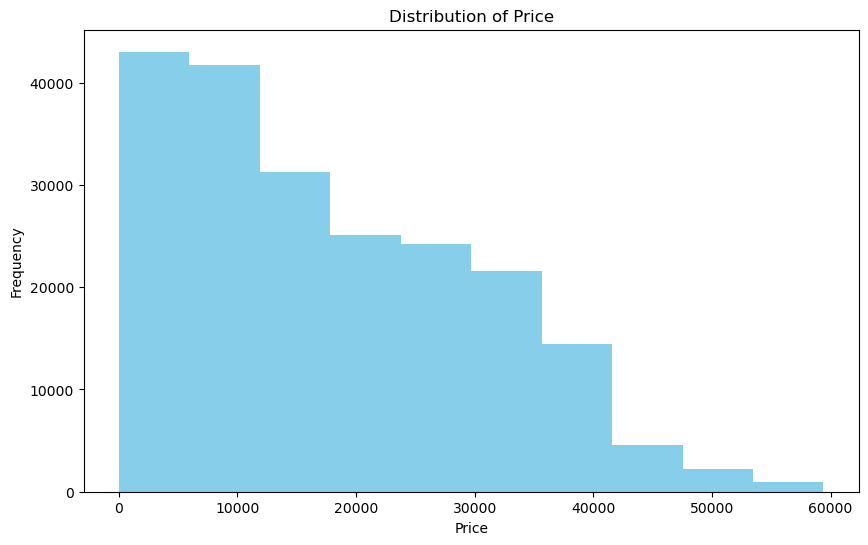

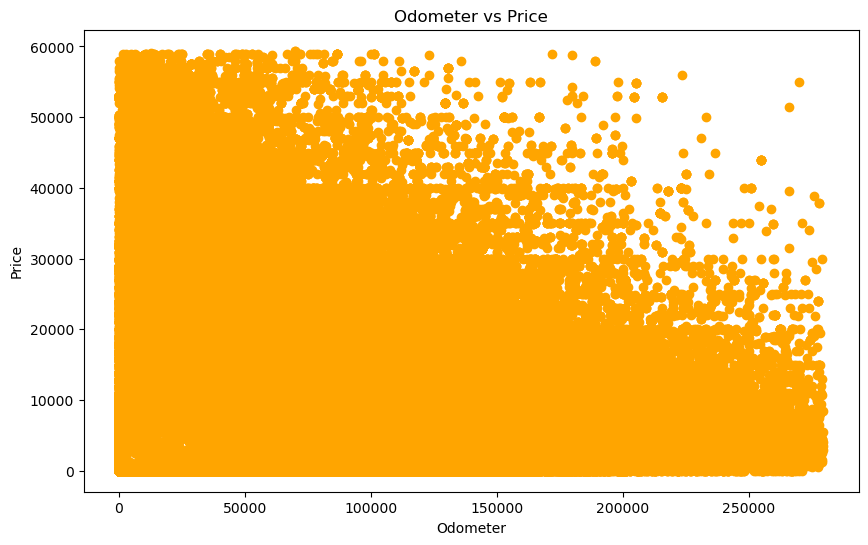

In [11]:
# Given the above charts, I realized sometting was wrong with the data. I decided to remove outliers from the data.



# Calculate IQR for 'price' and 'odometer'
Q1_price = vehicles_df['price'].quantile(0.25)
Q3_price = vehicles_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_odometer = vehicles_df['odometer'].quantile(0.25)
Q3_odometer = vehicles_df['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

# Define bounds for outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_odometer = Q1_odometer - 1.5 * IQR_odometer
upper_bound_odometer = Q3_odometer + 1.5 * IQR_odometer

# Filter DataFrame to exclude outliers
filtered_df = vehicles_df[(vehicles_df['price'].between(lower_bound_price, upper_bound_price)) &
                          (vehicles_df['odometer'].between(lower_bound_odometer, upper_bound_odometer))]

# Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['price'], bins=10, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['odometer'], filtered_df['price'], color='orange')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Odometer vs Price')
plt.show()

In [12]:
# Performing simple linear regression with just the two numerical features to start
from sklearn.linear_model import LinearRegression

X = filtered_df[['year', 'odometer']]
y = filtered_df['price']

model = LinearRegression().fit(X, y)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions
y_pred = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 Score:", r2)


Mean Squared Error: 101870836.42037565
Root Mean Squared Error: 10093.108362658932
R^2 Score: 0.3711631644061897


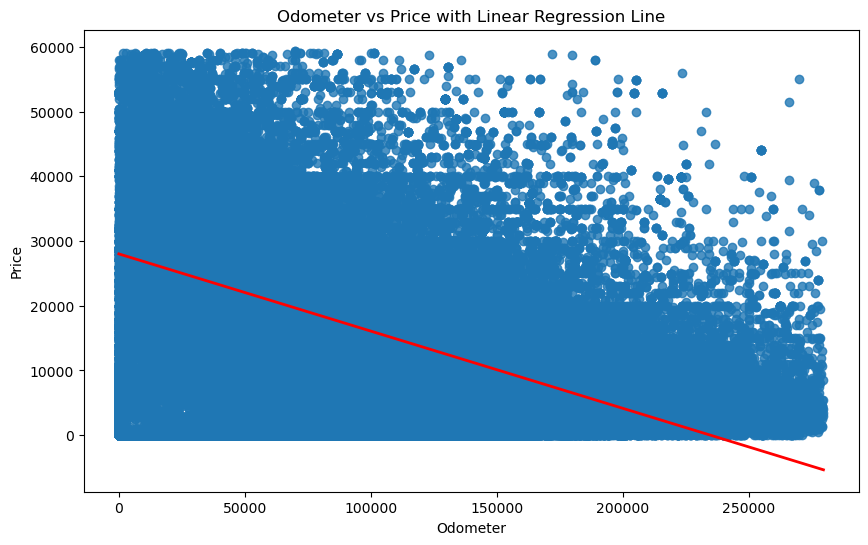

In [14]:
import seaborn as sns

# Plot the relationship between odometer and price with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='odometer', y='price', data=filtered_df, line_kws={"color": "red", "lw": 2})
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Odometer vs Price with Linear Regression Line')
plt.show()


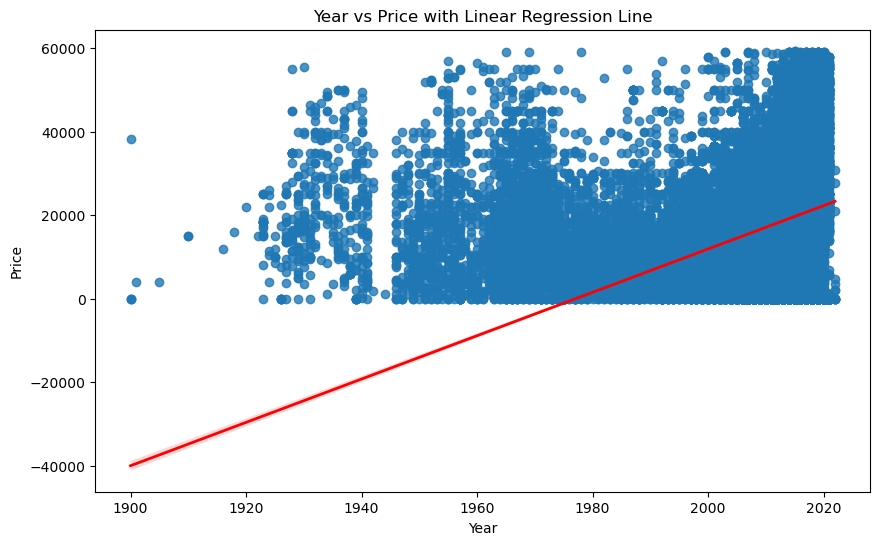

In [15]:
import seaborn as sns

# Plot the relationship between year and price with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='price', data=filtered_df, line_kws={"color": "red", "lw": 2})
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price with Linear Regression Line')
plt.show()


In [16]:
# Preprocess the data

# Separate features and target variable
X = filtered_df.drop('price', axis=1)
y = filtered_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create column transformers for preprocessing
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_include=object)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = make_column_transformer(
    (numerical_transformer, numerical_features),
    (categorical_transformer, categorical_features)
)

# Display the preprocessor pipeline
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000017402DB5410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000174024C7850>)])

In [17]:
# Build and evaluate the regression model

# Create a pipeline for the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


Mean Squared Error: 77902350.0627705
Root Mean Squared Error: 8826.23079591569
R^2 Score: 0.520581818434328


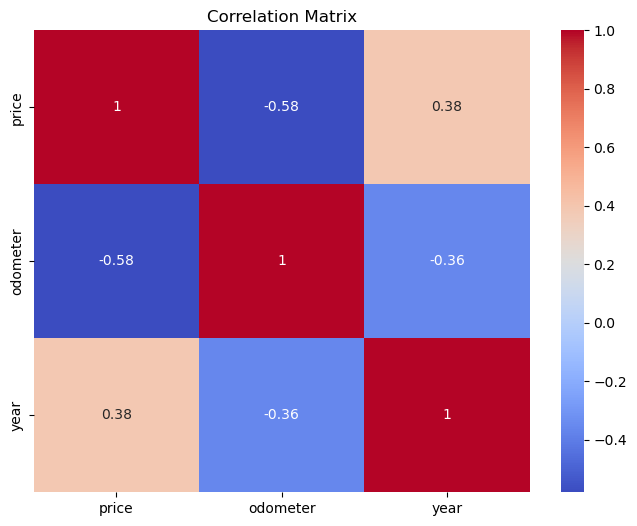

In [18]:
# Calculate the correlation matrix
correlation_matrix = filtered_df[['price', 'odometer', 'year']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


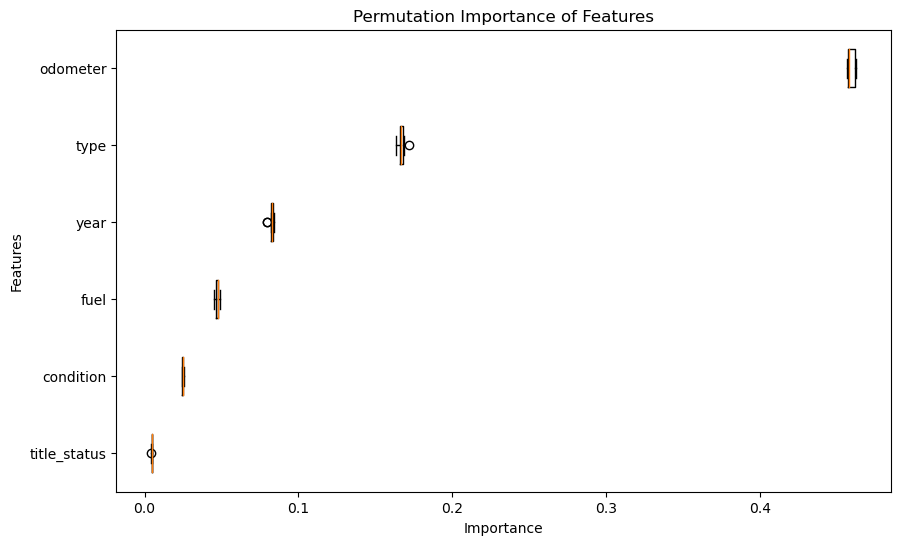

In [20]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Sort feature importances in descending order
sorted_idx = result.importances_mean.argsort()

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importance of Features")
ax.set_ylabel("Features")
ax.set_xlabel("Importance")
plt.show()